In [1]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (24, 14)

#https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [2]:
def plot1(f, x0=-5, x1=5, y0=-5, y1=5, log_scale=False):
    x = np.linspace(x0, x1, 100)
    y = np.linspace(y0, y1, 100)
    X, Y = np.meshgrid(x, y)
    if log_scale:
        Z = np.log(f(X, Y)) #just for better visualization
    else:
        Z = f(X, Y)

    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.colorbar();

def plot2(f):
    x = np.linspace(0, 5, 100)
    y = np.linspace(0, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    plt.contour(X, Y, Z, 20, cmap='RdGy');
    plt.colorbar();

def plot3(f):
    x = np.linspace(0, 5, 100)
    y = np.linspace(0, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    contours = plt.contour(X, Y, Z, 3, colors='black')
    plt.clabel(contours, inline=True, fontsize=8)

    plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
            cmap='RdGy', alpha=0.5)
    plt.colorbar();

In [3]:
def f1(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

def df1(x, y):
    return -y*np.cos(x)*np.sin(y*x+10) - np.sin(x)*np.cos(y*x+10) + 10*np.cos(x)*np.sin(x)**9, \
              -np.sin(10 + y*x)*x*np.cos(x)

f1_conf = {
    'f': f1,
    'df': df1,
    'x0': 1,
    'x1': 4,
    'y0': 0,
    'y1': 4,
    'starting_point': [1.5, 2],
    'learning_rate': 0.1,
    'adam_learning_rate': 0.1,
    'rmsprop_learning_rate': 0.1,
    'momentum': 0.7,
    'log_scale': False,
    'n_iter': 100
}

In [4]:
def f2(x, y):
    return x**2 - y**2 + y**4

def df2(x, y):
    return 2*x, -2*y + 4*y**3

f2_conf = {
    'f': f2,
    'df': df2,
    'x0': -1.5,
    'x1': 2,
    'y0': -0.5,
    'y1': 2,
    'starting_point': [1.5, 1e-13],
    'learning_rate': 0.05,
    'adam_learning_rate': 0.05,
    'rmsprop_learning_rate': 0.05,
    'momentum': 0.9,
    'log_scale': False,
    'n_iter': 100
}

In [5]:
#beale function
def f3(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def df3(x, y):
    return 2*(y**3-1)*(y**3*x-x+21/8)+2*(y**2-1)*(y**2*x-x+9/4)+2*(y-1)*(y*x-x+3/2), \
    6*x*y**2*(x*y**3-x+21/8)+4*x*y*(x*y**2-x+9/4)+2*x*(x*y-x+3/2)

f3_conf = {
    'f': f3,
    'df': df3,
    'x0': -2,
    'x1': 5,
    'y0': -5,
    'y1': 5,
    'starting_point': [2, 1.5],
    'learning_rate': 0.001,
    'adam_learning_rate': 0.1,
    'rmsprop_learning_rate': 0.1,
    'momentum': 0.95,
    'log_scale': True,
    'n_iter': 1000
}

In [6]:
def gradient_descent(df, starting_point, learning_rate=0.1, n_iter=100):
    point = starting_point
    trajectory = [point]
    for i in range(n_iter):
        grad = df(*point)
        point = point - np.multiply(learning_rate, grad)
        trajectory.append(point)

    return np.array(trajectory)

def momentum_gradient_descent(df, starting_point, learning_rate=0.1, momentum = 0.7, n_iter=100):
    point = starting_point
    trajectory = [point]
    cache = np.zeros_like(point)
    for i in range(n_iter):
        grad = df(*point)
        cache = np.multiply(momentum, cache) - np.multiply(learning_rate, grad)
        point = point + cache
        trajectory.append(point)

    return np.array(trajectory)

#https://www.cs.toronto.edu/~fritz/absps/momentum.pdf On the importance of initialization and momentum in deep learning
def nesterov_sutskever(df, starting_point, learning_rate=0.1, momentum = 0.7, n_iter=100):
    point = starting_point
    trajectory = [point]
    velocity = np.zeros_like(point)
    for i in range(n_iter):
        grad = df(*(point + np.multiply(momentum, velocity)))
        velocity = np.multiply(momentum, velocity) - np.multiply(learning_rate, grad)
        point = point + velocity
        trajectory.append(point)

    return np.array(trajectory)

#https://arxiv.org/pdf/1212.0901.pdf ADVANCES IN OPTIMIZING RECURRENT NETWORKS
def nesterov_bengio(df, starting_point, learning_rate=0.1, momentum = 0.7, n_iter=100):
    point = starting_point
    trajectory = [point]
    cache = np.zeros_like(point)
    old_cache = np.zeros_like(point)
    for i in range(n_iter):
        grad = df(*point)
        old_cache = cache
        cache = np.multiply(momentum, cache) - np.multiply(learning_rate, grad)
        point = point - np.multiply(momentum, old_cache) + np.multiply((1 + momentum), cache)
        trajectory.append(point)

    return np.array(trajectory)

#https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf 
def rmsprop(df, starting_point, learning_rate=0.1, beta = 0.9, epsilon = 1e-8, n_iter=100):
    point = starting_point
    trajectory = [point]
    cache = np.zeros_like(point)
    for i in range(n_iter):
        grad = df(*point)
        cache = np.multiply(beta, cache) + np.multiply(1 - beta, np.square(grad))
        point = point - np.multiply(learning_rate, np.divide(grad, np.sqrt(cache) + epsilon))
        trajectory.append(point)

    return np.array(trajectory)

#https://arxiv.org/pdf/1412.6980.pdf ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION
def adam(df, starting_point, learning_rate=0.1, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, n_iter=100):
    point = starting_point
    trajectory = [point]
    m = np.zeros_like(point)
    v = np.zeros_like(point)
    for i in range(n_iter):
        grad = df(*point)
        m = np.multiply(beta1, m) + np.multiply(1 - beta1, grad)
        v = np.multiply(beta2, v) + np.multiply(1 - beta2, np.square(grad))
        m_hat = np.divide(m, 1 - beta1**(i+1))
        v_hat = np.divide(v, 1 - beta2**(i+1))
        point = point - np.multiply(learning_rate, np.divide(m_hat, np.sqrt(v_hat) + epsilon))
        trajectory.append(point)

    return np.array(trajectory)

In [7]:
functions_conf = [f1_conf, f2_conf, f3_conf]

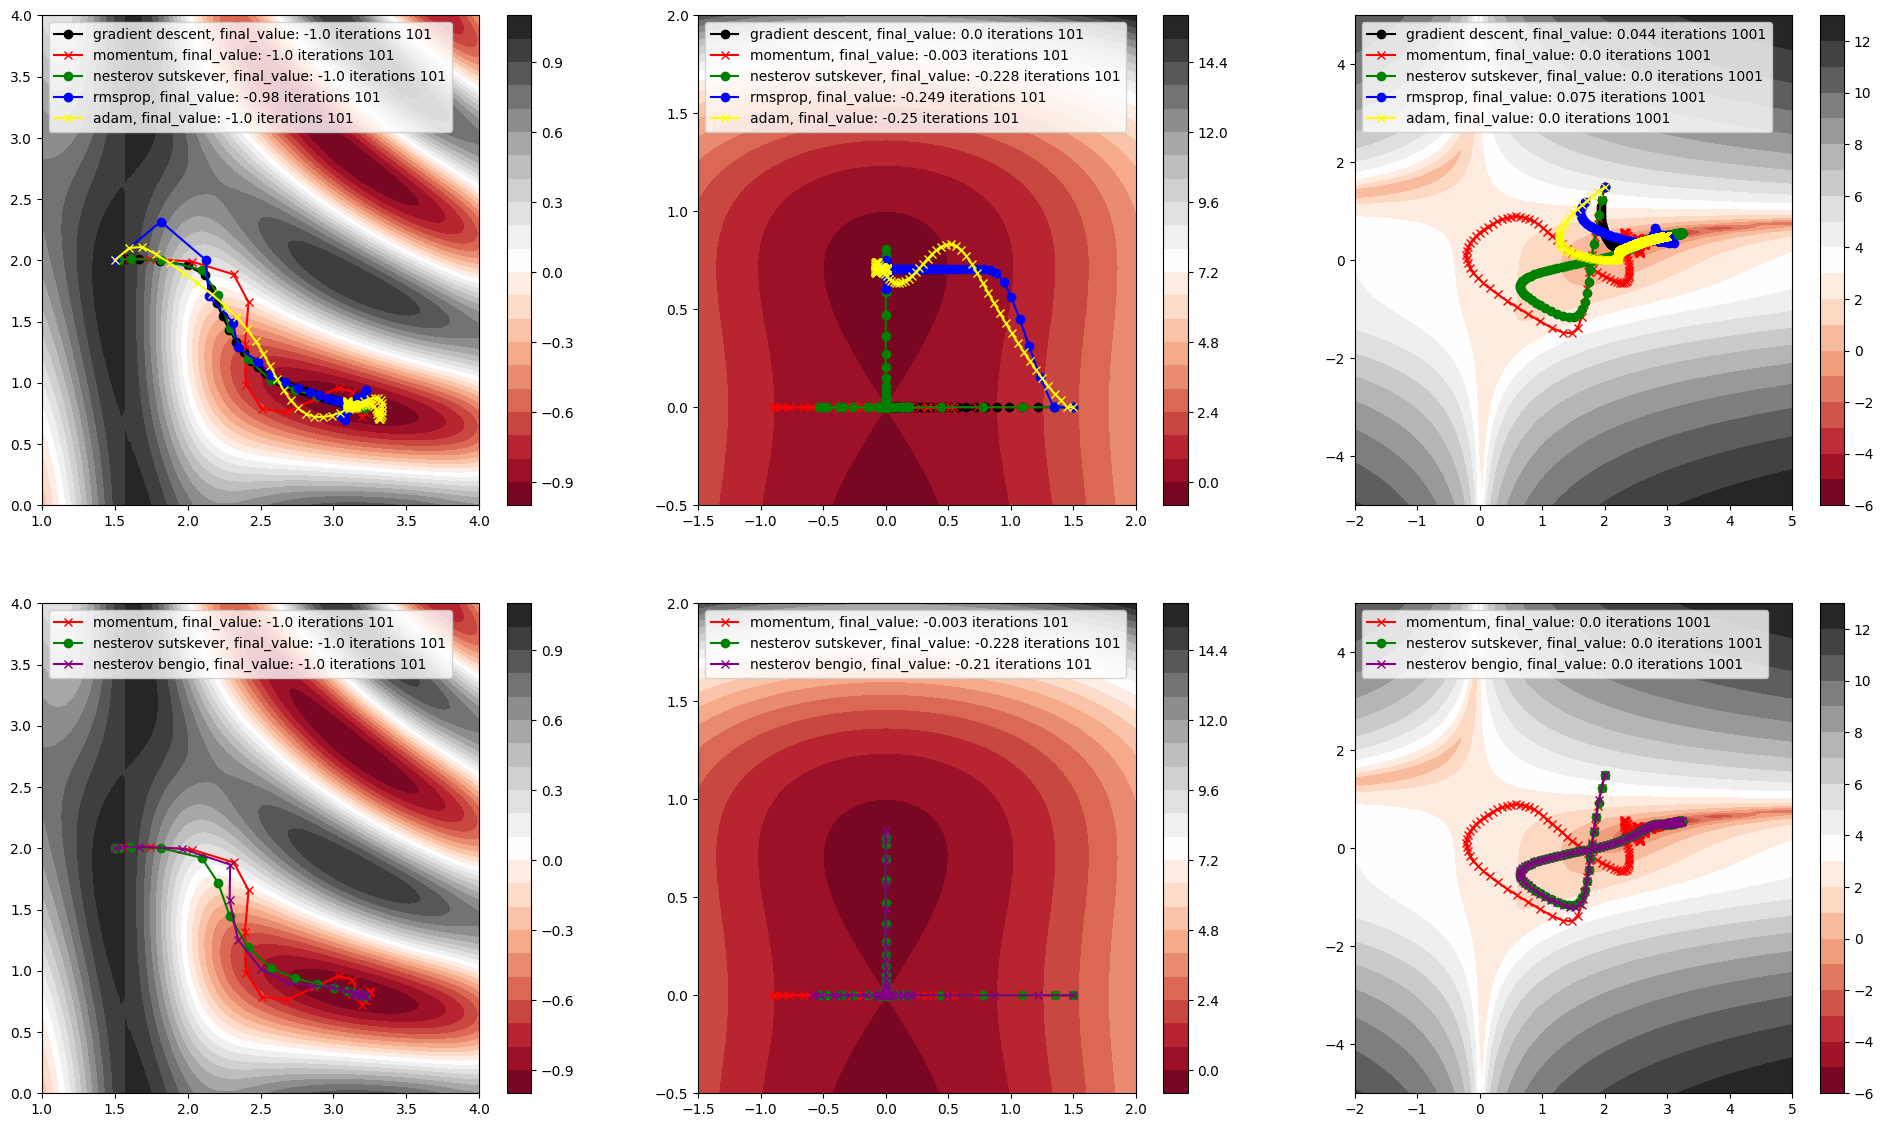

In [9]:
i = 1
for conf in functions_conf:
    gradient_trajectory = gradient_descent(conf['df'], starting_point=conf['starting_point'], learning_rate=conf['learning_rate'], n_iter=conf['n_iter'])
    momentum_trajectory = momentum_gradient_descent(conf['df'], starting_point=conf['starting_point'], learning_rate=conf['learning_rate'], momentum=conf['momentum'], n_iter=conf['n_iter'])
    nesterov_sutskever_trajectory = nesterov_sutskever(conf['df'], starting_point=conf['starting_point'], learning_rate=conf['learning_rate'], momentum=conf['momentum'], n_iter=conf['n_iter'])
    nesterov_bengio_trajectory = nesterov_bengio(conf['df'], starting_point=conf['starting_point'], learning_rate=conf['learning_rate'], momentum=conf['momentum'], n_iter=conf['n_iter'])
    rmsprop_trajectory = rmsprop(conf['df'], starting_point=conf['starting_point'], learning_rate=conf['rmsprop_learning_rate'], beta=0.9, epsilon=1e-8, n_iter=conf['n_iter'])
    adam_trajectory = adam(conf['df'], starting_point=conf['starting_point'], learning_rate=conf['adam_learning_rate'], beta1=0.9, beta2=0.999, epsilon=1e-8, n_iter=conf['n_iter'])

    plt.subplot(2, len(functions_conf), i)
    plot1(conf['f'], conf['x0'], conf['x1'], conf['y0'], conf['y1'], conf['log_scale'])
    plt.plot(*zip(*gradient_trajectory), '-o', color='black', label='gradient descent ' + str(np.round(conf['f'](*gradient_trajectory[-1]), 3)));
    plt.plot(*zip(*momentum_trajectory), '-x', color='red', label='momentum ' + str(np.round(conf['f'](*momentum_trajectory[-1]), 3)));
    plt.plot(*zip(*nesterov_sutskever_trajectory), '-o', color='green', label='nesterov sutskever ' + str(np.round(conf['f'](*nesterov_sutskever_trajectory[-1]), 3)));
    plt.plot(*zip(*rmsprop_trajectory), '-o', color='blue', label='rmsprop ' + str(np.round(conf['f'](*rmsprop_trajectory[-1]), 3)));
    plt.plot(*zip(*adam_trajectory), '-x', color='yellow', label='adam ' + str(np.round(conf['f'](*adam_trajectory[-1]), 3)));
    plt.legend(loc='upper left');
    
    plt.subplot(2, len(functions_conf), i+len(functions_conf))
    plot1(conf['f'], conf['x0'], conf['x1'], conf['y0'], conf['y1'], conf['log_scale'])
    plt.plot(*zip(*momentum_trajectory), '-x', color='red', label='momentum ' + str(np.round(conf['f'](*momentum_trajectory[-1]), 3)));
    plt.plot(*zip(*nesterov_sutskever_trajectory), '-o', color='green', label='nesterov sutskever ' + str(np.round(conf['f'](*nesterov_sutskever_trajectory[-1]), 3)));
    plt.plot(*zip(*nesterov_bengio_trajectory), '-x', color='purple', label='nesterov bengio ' + str(np.round(conf['f'](*nesterov_bengio_trajectory[-1]), 3)));
    plt.legend(loc='upper left');

    i += 1